# Practice

## Libraries

In [97]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [98]:
# Data contoh (suhu harian dalam deret waktu)
data = np.array([35, 35, 35, 34, 36,
                 36, 34, 34, 36, 33,
                 36, 35, 35, 35, 34,
                 34, 35, 35, 35, 34,
                 36, 35, 36, 35, 36,
                 35, 36, 36, 36, 36])

sequence_length = 5

In [99]:
def prepare_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = prepare_data(data, sequence_length)

## Model

In [100]:
model = Sequential()
model.add(SimpleRNN(100, activation = 'relu',input_shape = (sequence_length, 1)))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X.reshape(-1, sequence_length, 1), y, epochs = 100, verbose = 0)

loss = model.evaluate(X.reshape(-1, sequence_length, 1), y)
print("Loss pada data pelatihan:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.7595
Loss pada data pelatihan: 0.7595060467720032


In [101]:
# Membuat prediksi untuk nilai berikutnya
next_sequence = np.array([34, 36, 36, 34, 34])
next_sequence = next_sequence.reshape(1, sequence_length, 1)
predicted_temperature = model.predict(next_sequence) #34
print("Prediksi suhu berikutnya:", predicted_temperature[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediksi suhu berikutnya: 34.98767


## Model with Standardization

In [102]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_reshaped = data.reshape(-1, 1)
data_scaled = scaler.fit_transform(data_reshaped).flatten()

def prepare_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X, y = prepare_data(data_scaled, sequence_length)

model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X.reshape(-1, sequence_length, 1), y, epochs=150, verbose=0)

loss = model.evaluate(X.reshape(-1, sequence_length, 1), y)
print("Loss pada data pelatihan:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0154
Loss pada data pelatihan: 0.015367391519248486


In [103]:
next_sequence = np.array([34, 36, 36, 34, 34])
next_sequence_scaled = scaler.transform(next_sequence.reshape(-1, 1)).flatten()
next_sequence_scaled = next_sequence_scaled.reshape(1, sequence_length, 1)

predicted_temperature_scaled = model.predict(next_sequence_scaled)
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)
print("Prediksi suhu berikutnya:", predicted_temperature[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediksi suhu berikutnya: 36.13707


# Assignment (Stock Dataset)

## Dataset

In [104]:
df = pd.read_csv('../Dataset/stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700
1,2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41548800
2,2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700
3,2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400
4,2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500
...,...,...,...,...,...,...,...
246,2024-05-21,178.399994,179.820007,177.309998,179.539993,179.539993,14706000
247,2024-05-22,178.399994,178.852005,176.779999,178.000000,178.000000,16189400
248,2024-05-23,178.779999,179.910004,174.539993,175.059998,175.059998,14928400
249,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600


## Data Splitting & Standardization

In [105]:
df_close = df['Close']
df_close = pd.DataFrame(df_close)
df_train, df_test = train_test_split(df_close, test_size = 0.35, shuffle = False)

scaler = MinMaxScaler()

df_train = scaler.fit_transform(df_train.values.reshape(-1, 1))
df_test = scaler.transform(df_test.values.reshape(-1, 1))

print(df_train.shape)
print(df_test.shape)

(163, 1)
(88, 1)


In [106]:
X_train, y_train = [], []

time_steps = 30
for i in range(time_steps, df_train.shape[0]):
    X_train.append(df_train[(i - time_steps):i])
    y_train.append(df_train[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(133, 30, 1)
(133,)


In [107]:
X_test, y_test = [], []

for i in range(time_steps, df_test.shape[0]):
    X_test.append(df_test[(i - time_steps):i])
    y_test.append(df_test[i, 0])

X_test=np.array(X_test)
y_test=np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(58, 30, 1)
(58,)


## Model

In [108]:
reg=Sequential()
reg.add(SimpleRNN(units = 100, input_shape = (X_train.shape[1:]), return_sequences = True))
reg.add(Dropout(0.2))

reg.add(SimpleRNN(units = 100, activation = 'relu', return_sequences = True))
reg.add(Dropout(0.2))

reg.add(SimpleRNN(units = 100, activation = 'relu'))
reg.add(Dropout(0.2))
reg.add(Dense(units = 1, activation = 'relu'))

reg.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_32 (SimpleRNN)            │ (None, 30, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_33 (SimpleRNN)            │ (None, 30, 100)             │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_34 (SimpleRNN)            │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,501 (197.27 KB)

 Trainable params: 50,501 (197.27 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
reg.compile(loss = 'mse', optimizer = 'Adam')
reg.fit(X_train, y_train, epochs = 150, validation_data = (X_test, y_test))

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.3086 - val_loss: 0.3439
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 828ms/step - loss: 0.0740 - val_loss: 0.1804
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 502ms/step - loss: 0.0598 - val_loss: 0.3531
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - loss: 0.0615 - val_loss: 0.1378
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 652ms/step - loss: 0.0402 - val_loss: 0.2745
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 588ms/step - loss: 0.0350 - val_loss: 0.1550
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 506ms/step - loss: 0.0296 - val_loss: 0.1650
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - loss: 0.0175 - val_loss: 0.0731
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - loss: 0.0281 - val_loss: 0.1501
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - loss: 0.0257 - val_loss: 0.0662
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 499ms/step - loss: 0.0219 - val_loss: 0.1540
Epoch 12/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - loss: 0.0

## Evaluation

In [110]:
err_tr = reg.evaluate(X_train, y_train)
err_ts = reg.evaluate(X_test,y_test)

y_pred = reg.predict(X_test)

y_pred_r = y_pred / scaler.scale_[0]
y_test_r = y_test / scaler.scale_[0]

print(f'{np.min(y_pred_r):.2f}')
print(f'{np.max(y_pred_r):.2f}')
print(f'{np.min(y_test_r):.2f}')
print(f'{np.max(y_test_r):.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: 0.0029
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 0.0080
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
14.76
61.61
15.69
62.67


## Visualization

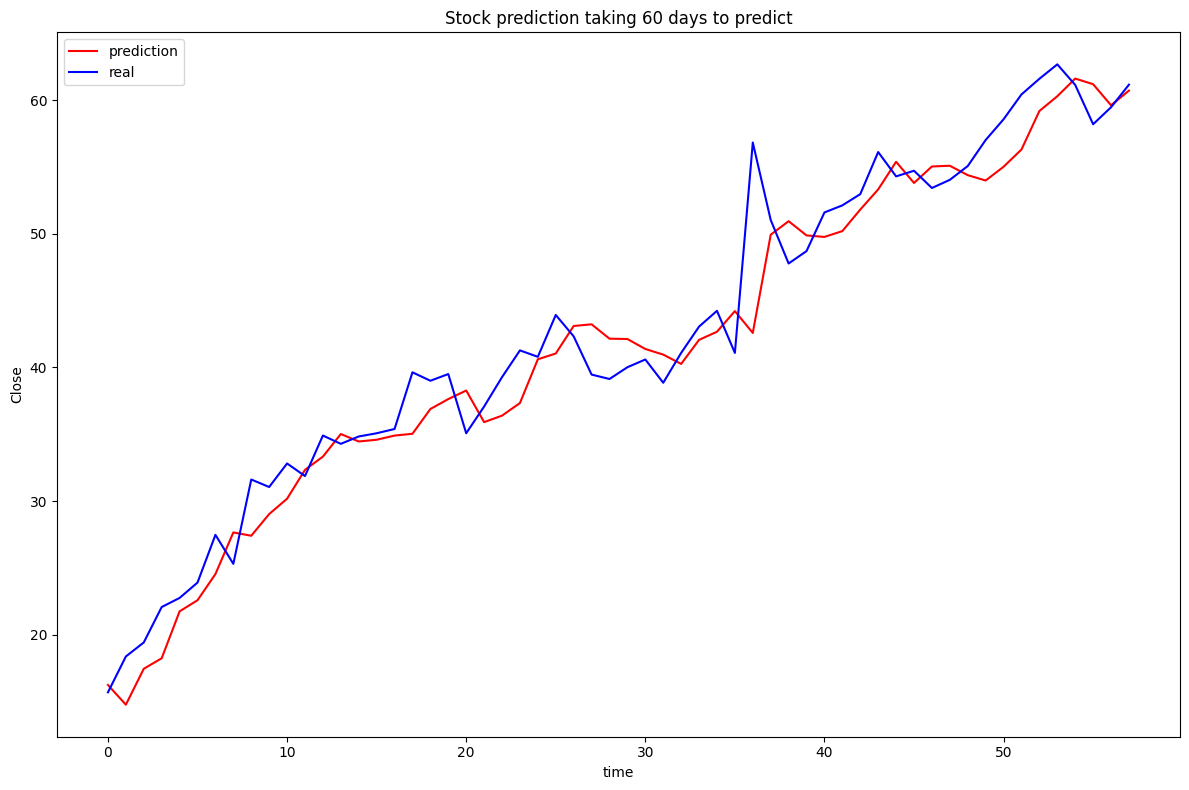

In [111]:
plt.figure(figsize = (12, 8))
plt.plot(y_pred_r, color = 'r', label = 'prediction')
plt.plot(y_test_r, color = 'b', label = 'real')
plt.xlabel('time')
plt.ylabel('Close')
plt.title('Stock prediction taking 60 days to predict')
plt.tight_layout()
plt.legend()
plt.show()